In [46]:
import openmesh_data_converter as odc

import pandas as pd
import os

In [49]:
# Reload the module to get the updated code
import importlib
importlib.reload(odc)

# Now run the transform again
zip_path = odc.download_jacoby_2025_OpenMesh(
    local_path="data/openmesh/",
    print_output=True
)

ds_nyc = odc.transform_jacoby_2025_OpenMesh(
    fn=zip_path,
    extract_path="data/openmesh/",
    reshape=True  # This is True by default
)


# Read OpenMesh links metadata
metadata_path = "data/openmesh/links_metadata.csv"
df_links_metadata = pd.read_csv(metadata_path)

# Check the result
print(ds_nyc.dims)
print(ds_nyc.data_vars)



File already exists at data/openmesh/OpenMesh.zip
Not downloading!
Extracting OpenMesh.zip...
Loading data/openmesh/OpenMesh.nc...
Reshaping to OpenSense format...
Transformation complete!
FrozenMappingWarningOnValuesAccess({'sublink_id': 1, 'time': 354241, 'cml_id': 103})
Data variables:
    rsl      (time, sublink_id, cml_id) float32 146MB -65.0 -62.0 ... -69.0


In [30]:

print(ds_nyc)
print("\nDimensions:", ds_nyc.dims)
print("\nCoordinates:", list(ds_nyc.coords))
print("\nData variables:", list(ds_nyc.data_vars))
print("\nRSL shape:", ds_nyc.rsl.dims if 'rsl' in ds_nyc else "rsl not found")
t_start = ds_nyc.time.min().data
t_end = ds_nyc.time.max().data
print(t_start, t_end)


<xarray.Dataset> Size: 149MB
Dimensions:       (sublink_id: 1, time: 354241, cml_id: 103)
Coordinates:
  * sublink_id    (sublink_id) object 8B 'sublink_1'
  * cml_id        (cml_id) int32 412B 1 2 3 4 5 6 7 ... 97 98 99 100 101 102 103
    site_0_lat    (cml_id) float64 824B ...
    site_0_lon    (cml_id) float64 824B ...
    site_1_lat    (cml_id) float64 824B ...
    site_1_lon    (cml_id) float64 824B ...
    length        (cml_id) float64 824B ...
    frequency     (sublink_id, cml_id) int64 824B 62640 60480 ... 5760 5710
    polarization  (sublink_id, cml_id) object 824B 'v' 'v' 'v' ... 'v' 'v' 'v'
  * time          (time) datetime64[ns] 3MB 2023-10-29 ... 2024-07-01
Data variables:
    rsl           (time, sublink_id, cml_id) float32 146MB -65.0 -62.0 ... -69.0
Attributes:
    title:                 OpenMesh
    file_author_s:         Dror Jacoby
    institution:           WiMNet Lab, Columbia University; CellEnMon Lab, Te...
    date:                  2025-04-23
    source:    

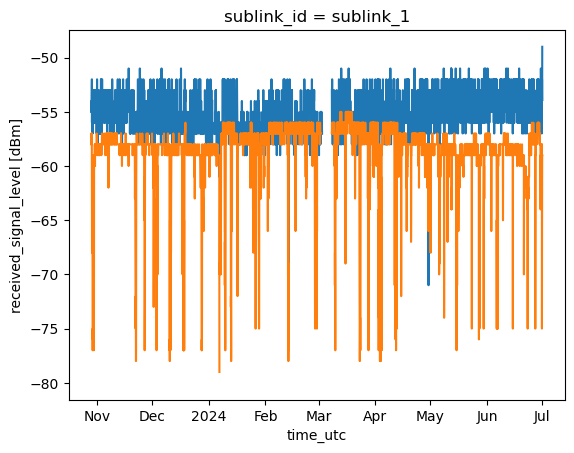

In [71]:
ds_nyc.rsl.isel(sublink_id=0,cml_id = [5,6]).resample(time='1h').min().plot.line(x='time', add_legend=False);

In [44]:

# Read all weather data
weather_base_path = "data/weather/"

# Initialize dictionary to store all weather dataframes
weather_data = {}

# 1. Airport data
print("Loading Airport Weather Data...")
airport_files = {
    'condition': 'condition_airports.csv',
    'dew_point': 'dew_point_airports.csv',
    'humidity': 'humidity_airports.csv',
    'precip': 'precip_airports.csv',
    'pressure': 'pressure_airports.csv',
    'temperature': 'temperature_airports.csv',
    'wind_direction': 'wind_direction_airports.csv',
    'wind_gust': 'wind_gust_airports.csv',
    'wind_speed': 'wind_speed_airports.csv'
}

weather_data['airports'] = {}
for key, filename in airport_files.items():
    path = os.path.join(weather_base_path, 'airports', filename)
    weather_data['airports'][key] = pd.read_csv(path, index_col=0, parse_dates=True)
    print(f"  ✓ {key}: {weather_data['airports'][key].shape}")

# 2. NOAA data
print("\nLoading NOAA Weather Data...")
noaa_files = {
    'precip': 'pcpn_noaa.csv',
    'snow': 'snow_noaa.csv',
    'snow_depth': 'snwd_noaa.csv'
}

weather_data['noaa'] = {}
for key, filename in noaa_files.items():
    path = os.path.join(weather_base_path, 'noaa', filename)
    weather_data['noaa'][key] = pd.read_csv(path, index_col=0, parse_dates=True)
    print(f"  ✓ {key}: {weather_data['noaa'][key].shape}")

# 3. PWS (Personal Weather Stations) data
print("\nLoading PWS Weather Data...")
pws_files = {
    'dew_point': 'dew_point_wu.csv',
    'humidity': 'humidity_wu.csv',
    'pressure': 'pressure_wu.csv',
    'temperature': 'temperature_wu.csv',
    'wind_direction': 'wind_direction_wu.csv',
    'wind_gust': 'wind_gust_wu.csv',
    'wind_speed': 'wind_speed_wu.csv',
    'precip': 'precip/precip_wu.csv',
    'precip_accum': 'precip/precip_accum_wu.csv'
}

weather_data['pws'] = {}
for key, filename in pws_files.items():
    path = os.path.join(weather_base_path, 'pws', filename)
    weather_data['pws'][key] = pd.read_csv(path, index_col=0, parse_dates=True)
    print(f"  ✓ {key}: {weather_data['pws'][key].shape}")

# 4. Weather metadata
print("\nLoading Weather Metadata...")
weather_metadata_path = os.path.join(weather_base_path, 'weather_metadata.csv')
df_weather_metadata = pd.read_csv(weather_metadata_path)
print(f"  ✓ metadata: {df_weather_metadata.shape}")

print("\n" + "=" * 60)
print("Weather Data Loading Complete!")
print("=" * 60)
print(f"\nAvailable sources: {list(weather_data.keys())}")
print(f"Total datasets loaded: {sum(len(v) for v in weather_data.values())}")

SyntaxError: invalid syntax (484313508.py, line 1)

In [59]:
# Load all weather data in one line
importlib.reload(odc)

weather_data = odc.load_weather_data(
    weather_base_path="data/weather/",
    print_output=True
)

# Access the data
airports_temp = weather_data['airports']['temperature']
noaa_precip = weather_data['noaa']['precip']
pws_humidity = weather_data['pws']['humidity']
weather_metadata = weather_data['metadata']

Loading Airport Weather Data...
  ✓ condition: (11807, 2)
  ✓ dew_point: (11807, 2)
  ✓ humidity: (11807, 2)
  ✓ precip: (11807, 2)
  ✓ pressure: (11807, 2)
  ✓ temperature: (11807, 2)
  ✓ wind_direction: (11807, 2)
  ✓ wind_gust: (11807, 2)
  ✓ wind_speed: (11807, 2)

Loading NOAA Weather Data...
  ✓ precip: (247, 3)
  ✓ snow: (247, 3)
  ✓ snow_depth: (247, 3)

Loading PWS Weather Data...
  ✓ dew_point: (79777, 37)
  ✓ humidity: (79777, 38)
  ✓ pressure: (79777, 38)
  ✓ temperature: (79777, 38)


/Users/drorjac/PycharmProjects/opensense_example_data_openmesh/OpenMesh/notebooks/openmesh_data_converter.py:333: DtypeWarning: Columns (30,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  def add_cml_attributes(ds):


  ✓ wind_direction: (79777, 39)
  ✓ wind_gust: (79777, 37)
  ✓ wind_speed: (79777, 38)
  ✓ precip: (70849, 37)
  ✓ precip_accum: (278, 37)

Loading Weather Metadata...
  ✓ metadata: (45, 6)

Weather Data Loading Complete!

Available sources: ['airports', 'noaa', 'pws', 'metadata']
Total datasets loaded: 21


In [60]:
# Load and check your metadata
df_links_metadata = pd.read_csv("data/openmesh/links_metadata.csv")
print("Current columns:", list(df_links_metadata.columns))
print("\nFirst few rows:")
print(df_links_metadata.head())

# Fix metadata
openmesh_links_metadata = odc.adjust_metadata_to_opensense(
    metadata_path="data/openmesh/links_metadata.csv",
    output_path="data/openmesh/links_metadata_corrected.csv"  # optional
)

print( '# Fix metadata:',
openmesh_links_metadata.head())


Current columns: ['sublink_id', 'frequency', 'length', 'site_0_lat', 'site_0_lon', 'site_1_lat', 'site_1_lon', 'rsl', 'polarization']

First few rows:
   sublink_id  frequency  length  site_0_lat  site_0_lon  site_1_lat  \
0           1      62640   623.0   40.729552  -73.945949   40.733910   
1           2      60480   222.1   40.727553  -73.946045   40.729552   
2           3      62640   623.0   40.729552  -73.945949   40.733910   
3           4      58320   451.8   40.736760  -73.954410   40.733902   
4           5      60480   222.1   40.729552  -73.945949   40.727553   

   site_1_lon   rsl polarization  
0  -73.950594 -60.0     Vertical  
1  -73.945949 -62.0     Vertical  
2  -73.950594 -60.0     Vertical  
3  -73.950604 -57.0     Vertical  
4  -73.946045 -57.0     Vertical  
Loading metadata from data/openmesh/links_metadata.csv...
Original columns: ['sublink_id', 'frequency', 'length', 'site_0_lat', 'site_0_lon', 'site_1_lat', 'site_1_lon', 'rsl', 'polarization']
✓ Renamed 'su

In [68]:
# Save converted files
SAVE = 1  # Set to 1 to save

if SAVE:
    import os

    # Create temp directory if it doesn't exist
    temp_dir = "data/temp/"
    os.makedirs(temp_dir, exist_ok=True)

    print("Saving converted files to", temp_dir)
    print("=" * 60)

    # 1. Save corrected metadata
    metadata_output = os.path.join(temp_dir, "links_metadata_cur.csv")
    openmesh_links_metadata.to_csv(metadata_output, index=False)
    print(f"✓ Saved metadata: {metadata_output}")

    # 2. Save reshaped NetCDF dataset
    # Fix: Remove 'coordinates' from encoding to avoid conflict
    ds_to_save = ds_nyc.copy()
    for var in ds_to_save.data_vars:
        if 'coordinates' in ds_to_save[var].encoding:
            del ds_to_save[var].encoding['coordinates']

    nc_output = os.path.join(temp_dir, "OpenMesh_cur.nc")
    ds_to_save.to_netcdf(nc_output)
    print(f"✓ Saved NetCDF: {nc_output}")

    print("\n" + "=" * 60)
    print("All files saved successfully!")
    print(f"Location: {os.path.abspath(temp_dir)}")
else:
    print("SAVE = 0, skipping file save")

Saving converted files to data/temp/
✓ Saved metadata: data/temp/links_metadata_cur.csv
✓ Saved NetCDF: data/temp/OpenMesh_cur.nc

All files saved successfully!
Location: /Users/drorjac/PycharmProjects/opensense_example_data_openmesh/OpenMesh/notebooks/data/temp
